In [65]:
!pip install openpyxl matplotlib

  Using cached matplotlib-3.7.1-cp311-cp311-macosx_11_0_arm64.whl (7.3 MB)
  Using cached contourpy-1.1.0-cp311-cp311-macosx_11_0_arm64.whl (229 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.40.0-cp311-cp311-macosx_10_9_universal2.whl (2.5 MB)
  Using cached kiwisolver-1.4.4-cp311-cp311-macosx_11_0_arm64.whl (63 kB)
  Using cached Pillow-9.5.0-cp311-cp311-macosx_11_0_arm64.whl (3.1 MB)
  Using cached pyparsing-3.1.0-py3-none-any.whl (102 kB)


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
np.random.seed(1)
n = 100
dates = pd.date_range(start='2050-01-01', periods=n, freq='D')
products = np.random.choice(['Tablet', 'Camera', 'Phone', 'Microphone', 'Keyboard'], n)
prices = np.round(np.random.uniform(50.0, 200.0, n), 2)
quantities = np.random.randint(1, 15, n)

data = {
    'Date': dates,
    'Product': products,
    'Price': prices,
    'Quantity': quantities
}

df = pd.DataFrame(data)
df.head()

Date     Product   Price  Quantity
0 2050-01-01  Microphone  147.16         7
1 2050-01-02    Keyboard  103.09        10
2 2050-01-03      Tablet  164.48         7
3 2050-01-04      Camera  103.48         1
4 2050-01-05  Microphone  162.92         1

In [54]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int64
dtype: object

In [55]:
df.to_csv('random_sales.csv', index=False)

In [56]:
df = pd.read_csv('random_sales.csv', parse_dates=['Date'], date_format='%Y-%m-%d')
df.head()

Date     Product   Price  Quantity
0 2050-01-01  Microphone  147.16         7
1 2050-01-02    Keyboard  103.09        10
2 2050-01-03      Tablet  164.48         7
3 2050-01-04      Camera  103.48         1
4 2050-01-05  Microphone  162.92         1

In [57]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int64
dtype: object

In [58]:
df.to_excel('sales_data.xlsx')

In [59]:
df.to_json('sales_data.json')

In [60]:
df.shape

(100, 4)

In [61]:
df.describe().round(2)

Date   Price  Quantity
count                  100  100.00    100.00
mean   2050-02-19 12:00:00  117.32      7.79
min    2050-01-01 00:00:00   51.35      1.00
25%    2050-01-25 18:00:00   81.13      5.00
50%    2050-02-19 12:00:00  114.10      8.00
75%    2050-03-16 06:00:00  161.21     11.25
max    2050-04-10 00:00:00  197.26     14.00
std                    NaN   42.47      4.03

In [62]:
df.values[:5]

array([[Timestamp('2050-01-01 00:00:00'), 'Microphone', 147.16, 7],
       [Timestamp('2050-01-02 00:00:00'), 'Keyboard', 103.09, 10],
       [Timestamp('2050-01-03 00:00:00'), 'Tablet', 164.48, 7],
       [Timestamp('2050-01-04 00:00:00'), 'Camera', 103.48, 1],
       [Timestamp('2050-01-05 00:00:00'), 'Microphone', 162.92, 1]],
      dtype=object)

In [69]:
product_sales = df.groupby('Product')['Quantity'].sum()
product_sales

Product
Camera        186
Keyboard      173
Microphone    106
Phone         124
Tablet        190
Name: Quantity, dtype: int64

In [74]:
average_prices = df.groupby('Product')['Price'].mean().round(2)
average_prices

Product
Camera        121.54
Keyboard      115.61
Microphone    129.43
Phone         123.47
Tablet        100.17
Name: Price, dtype: float64

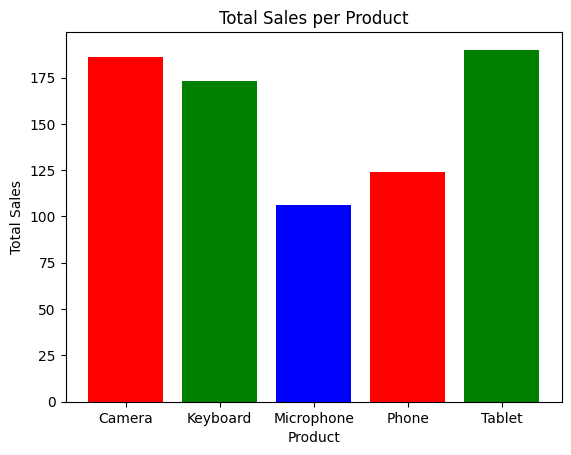

In [73]:
plt.bar(product_sales.index, product_sales.values, color=['red', 'green', 'blue'])
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

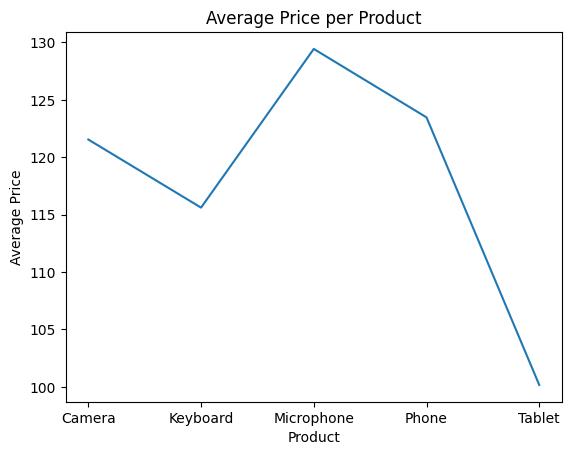

In [78]:
plt.plot(average_prices.index, average_prices.values)
plt.title('Average Price per Product')
plt.xlabel('Product')
plt.ylabel('Average Price')
plt.show()